In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
'''Sequence of steps to allow the writing of the results from ADM1 in the proper style to be accepted by AD_OCS'''

'Sequence of steps to allow the writing of the results from ADM1 in the proper style to be accepted by AD_OCS'

In [2]:
name = "thoni_2"
process = pd.read_csv(name + "_SS_values" + ".csv")
gas = pd.read_csv( name +"_SS_gas"  + ".csv")
influent = pd.read_csv(name + '_digester_influent.csv')
path = r"C:\Users\fede1\OneDrive - Politecnico di Milano\Documenti\GitHub\AD-OCS\Working data"


In [3]:
Rgas_m3_atm_K = 0.08205746e-3 # m^3*atm/(mol*K)
T_op = 42.5 +273.15 # K
P_op = 1 # atm
V_liq = 4050 #m3

In [4]:
HRT_vett = [10, 12, 13, 14, 15, 16, 17, 18, 20, 22, 24, 26]
SS_data = pd.DataFrame()
for ind in range(len(HRT_vett)):
    HRT = HRT_vett[ind]
    XT = process['X_xc'][ind]+ process['X_ch'][ind] + process['X_pr'][ind] + process['X_li'][ind]
    S1 = process['S_su'][ind] + process['S_aa'][ind] + process['S_fa'][ind] 
    S2 = (process['S_va'][ind]/208 + process['S_bu'][ind]/160 + process['S_pro'][ind]/112 + process['S_ac'][ind]/64)*1000
    X1 = (process['X_su'][ind] + process['X_aa'][ind] + process['X_fa'][ind])/1.55
    X2 = (process['X_ac'][ind] + process['X_h2'][ind] + process['X_c4'][ind] + process['X_pro'][ind])/1.55
    C = process['S_IC'][ind]*1000
    Z = S2 + process['S_hco3_ion'][ind]*1000
    CO2 = process['S_co2'][ind]*1000
    B = process['S_hco3_ion'][ind]*1000
    pH = process['pH'][ind]

    q_C = gas['q_co2'][ind]*P_op/(Rgas_m3_atm_K*T_op)/V_liq
    q_M = gas['q_ch4'][ind]*P_op/(Rgas_m3_atm_K*T_op)/V_liq
    p_C = gas['p_gas_co2'][ind]*1.01325  

    SS = {'HRT': HRT, 'X_T': XT, 'S_1': S1, 'S_2': S2, 'X_1': X1, 'X_2': X2, 'C': C, 'Z': Z, 'CO2': CO2, 'B': B, 'pH': pH, 'p_C': p_C, 'q_C': q_C, 'q_CH4': q_M}

    SS_data = SS_data.append(SS, ignore_index=True)
SS_data.set_index('HRT', inplace=True)

In [5]:
SS_data

,X_T,S_1,S_2,X_1,X_2,C,Z,CO2,B,pH,p_C,q_C,q_CH4
HRT,,,,,,,,,,,,,
10.0,8.217996,0.282597,2.057973,1.114647,0.787315,43.510011,34.943544,10.624439,32.885572,6.778705,0.392291,14.896919,25.358444
12.0,7.099236,0.226716,1.587453,1.132586,0.805077,46.783908,37.844756,10.526604,36.257303,6.825665,0.389044,13.167919,22.356133
13.0,6.649887,0.207278,1.435539,1.137777,0.810933,48.253088,39.201909,10.486718,37.766370,6.845366,0.387677,12.438376,21.093573
14.0,6.255832,0.191410,1.314938,1.141237,0.815401,49.640489,40.504048,10.451379,39.189111,6.863291,0.386425,11.778589,19.955516
15.0,5.907455,0.178200,1.216609,1.143368,0.818795,50.958266,41.755194,10.419681,40.538585,6.879760,0.385321,11.188865,18.938795
16.0,5.597244,0.167023,1.134747,1.144470,0.821348,52.214925,42.958598,10.391074,41.823851,6.894996,0.384340,10.658536,18.025130
17.0,5.319250,0.157435,1.065431,1.144772,0.823236,53.416677,44.116974,10.365134,43.051543,6.909161,0.383460,10.178728,17.199285
18.0,5.068699,0.149114,1.005905,1.144450,0.824595,54.568426,45.232664,10.341667,44.226759,6.922375,0.382614,9.732715,16.434733
20.0,4.635124,0.135364,0.908754,1.142454,0.826125,56.735731,47.344033,10.300452,46.435279,6.946363,0.381150,8.953371,15.100141


In [6]:
ind = ind = len(influent)-1
XT = influent['X_xc'][ind]+ influent['X_ch'][ind] + influent['X_pr'][ind] + influent['X_li'][ind]
S1 = influent['S_su'][ind] + influent['S_aa'][ind] + influent['S_fa'][ind] 
S2 = (influent['S_va'][ind]/208 + influent['S_bu'][ind]/160 + influent['S_pro'][ind]/112 + influent['S_ac'][ind]/64)*1000

C = influent['S_IC'][ind]*1000
N = influent['S_IN'][ind]*1000
CO2 = influent['S_co2'][ind]*1000

influent_data = {'S1in': [S1], 'S2in': [S2], 'Cin': [C], 'Nin': [N], 'XTin': [XT]}
infl = pd.DataFrame(influent_data)


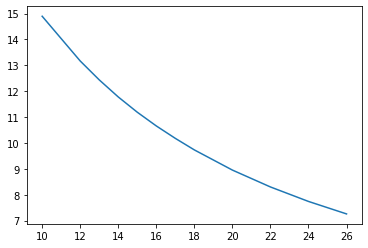

In [7]:
plt.plot(SS_data.index, SS_data['q_C'], label = 'X2')

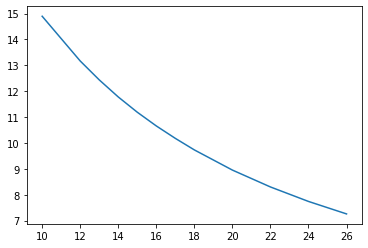

In [8]:
plt.plot(SS_data.index, SS_data['q_C'], label = 'X2')

In [9]:
with pd.ExcelWriter(name +'_working_data' + '.xlsx') as writer:
    SS_data.to_excel(writer, sheet_name='SS_Values', index=True)
    infl.to_excel(writer, sheet_name='Influent', index=False)